In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, fbeta_score, average_precision_score, confusion_matrix

Dataset Exploratory Analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
print(df.Class.value_counts())
print(df.duplicated().sum())

Class
0    284315
1       492
Name: count, dtype: int64
1081


In [13]:
dropped_dup_df = df.drop_duplicates()
print(dropped_dup_df
      .Class
      .value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


Feature Understanding

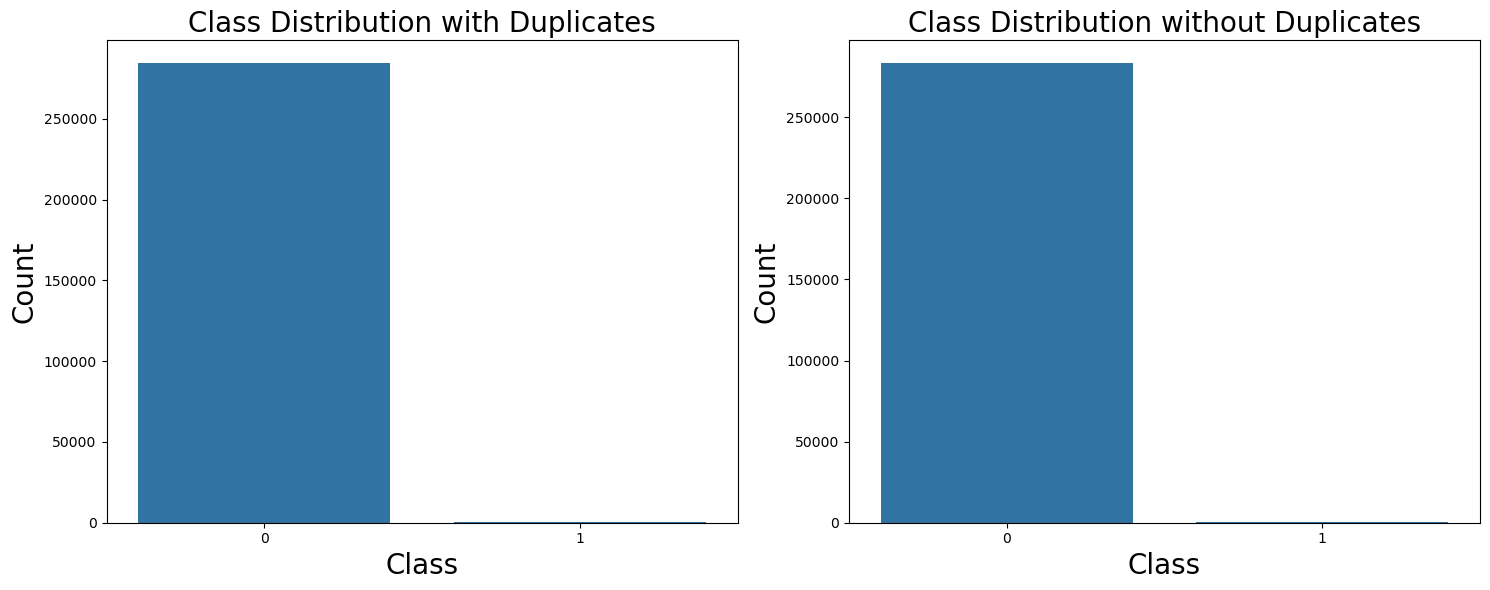

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Class', ax=ax1)
sns.countplot(data=dropped_dup_df, x='Class', ax=ax2)

ax1.set_title('Class Distribution with Duplicates', fontsize=20)
ax1.set_xlabel('Class', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)

ax2.set_title('Class Distribution without Duplicates', fontsize=20)
ax2.set_xlabel('Class', fontsize=20)
ax2.set_ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

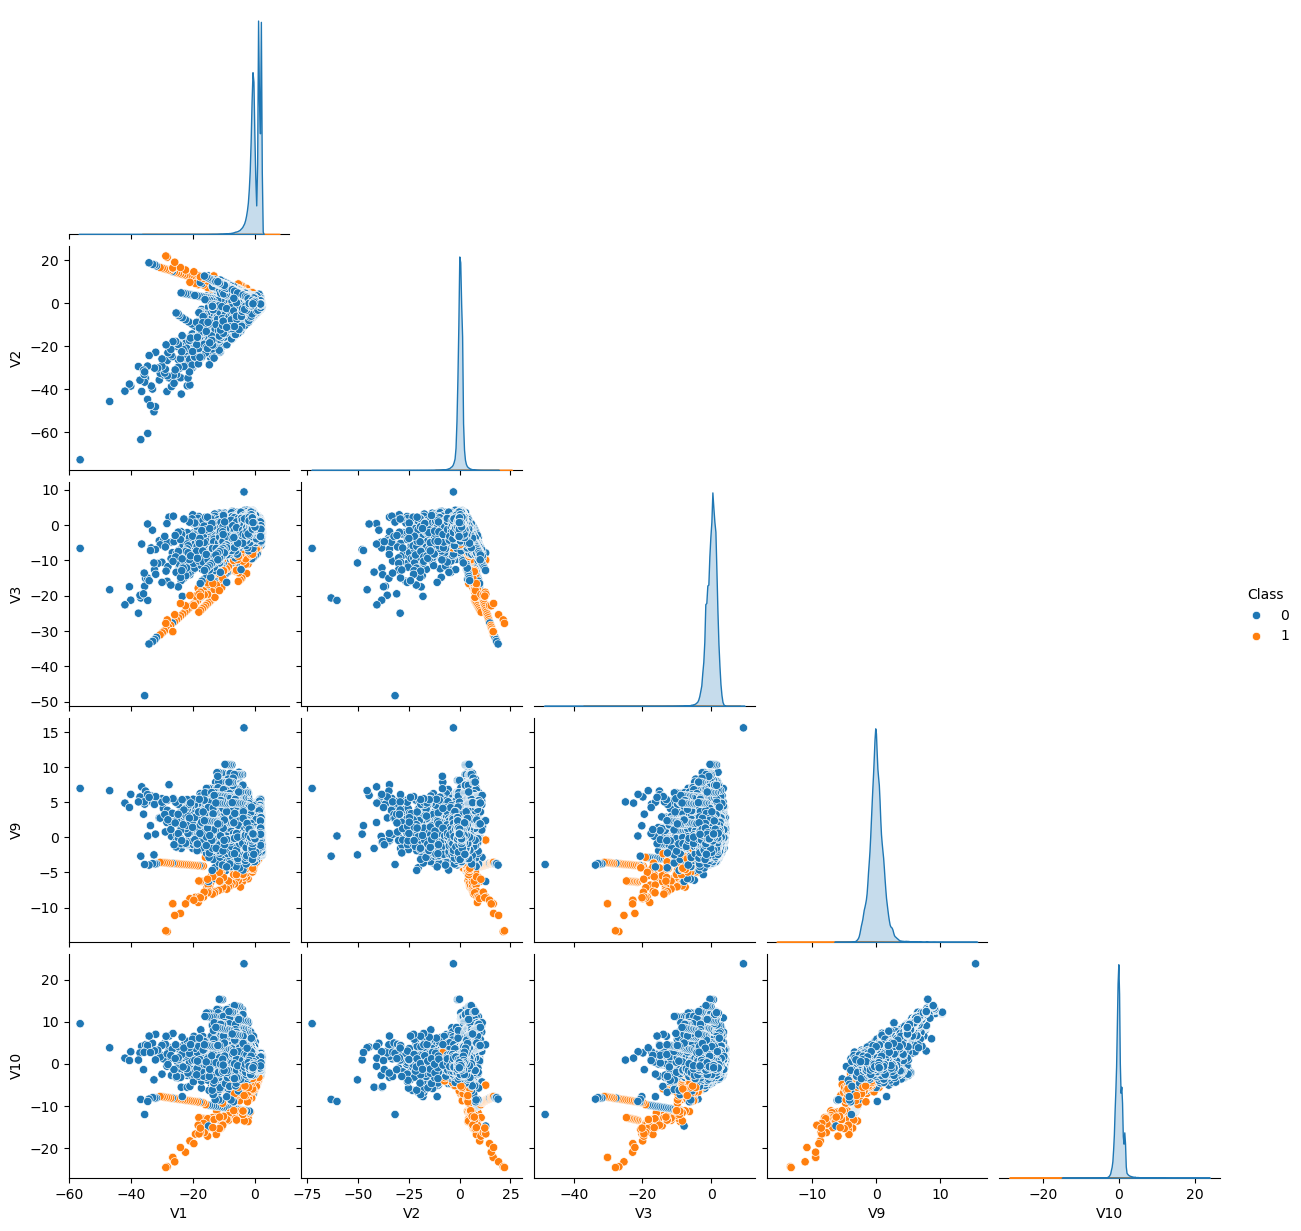

In [20]:
sns.pairplot(df,
             hue='Class',
             vars=['V1','V2','V3','V9','V10'],
             corner=True)

Text(0.5, 1.0, 'Percentage of Variance for Each Feature')

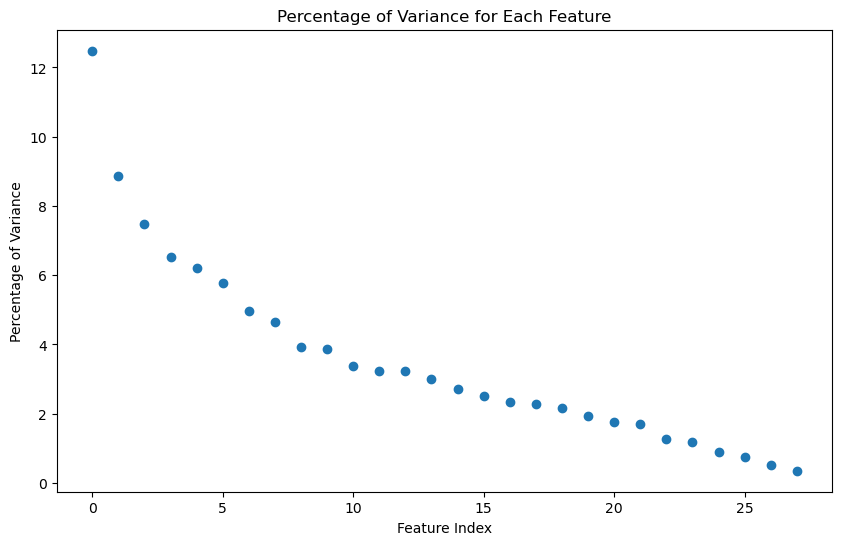

In [41]:
variances = np.array([X[column].var() for column in X.columns]) / sum([X[column].var() for column in X.columns]) * 100
plt.figure(figsize=(10, 6))
plt.plot(variances, 'o')
plt.xlabel('Feature Index')
plt.ylabel('Percentage of Variance')
plt.title('Percentage of Variance for Each Feature')

Feature Engineering

In [16]:
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
Y = df.Class

In [42]:
smote = SMOTE(random_state=0, 
              sampling_strategy=0.5,
              k_neighbors=10)

X_resampled, Y_resampled = smote.fit_resample(X, Y)

In [43]:
lda = LinearDiscriminantAnalysis()
X_lda = pd.DataFrame(lda.fit_transform(X_resampled, Y_resampled))

Models Evaluation

In [44]:
kfold = KFold(n_splits=10, 
              shuffle=True, 
              random_state=0)

In [45]:
LogisticRegression_model = LogisticRegression(max_iter=5000, 
                                              tol=1e-3,
                                              random_state=9,
                                              class_weight={0:1, 1:10},
                                              penalty='l1',
                                              solver='liblinear')

In [46]:
In_fold_metrics = {'precision':[], 'recall':[], 'f2':[], 'average_precision':[], 'fpr':[]}
Out_of_fold_metrics = {'precision':[], 'recall':[], 'f2':[], 'average_precision':[], 'fpr':[]}
TARGET_THRESHOLD = 0.5

for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, Y_resampled)):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    Y_train, Y_test = Y_resampled.iloc[train_index], Y_resampled.iloc[test_index]
    
    LogisticRegression_model.fit(X_train, Y_train)
    
    print(f"Fold {fold + 1}")

    #In fold testing
    LogisticRegression_in_fold_prediction = (LogisticRegression_model.predict_proba(X_train)[:,1] >= TARGET_THRESHOLD).astype(int)

    tn, fp, fn, tp = confusion_matrix(Y_train, LogisticRegression_in_fold_prediction).ravel()

    In_fold_metrics['fpr'].append(fp / (fp + tn))
    In_fold_metrics['precision'].append(tp / (tp + fp))
    In_fold_metrics['recall'].append(tp / (tp + fn))
    In_fold_metrics['f2'].append(
        fbeta_score(Y_train, LogisticRegression_in_fold_prediction, beta=2))
    In_fold_metrics['average_precision'].append(
        average_precision_score(Y_train, LogisticRegression_in_fold_prediction))
    
    #Out of fold testing
    LogisticRegression_out_of_fold_prediction = (LogisticRegression_model.predict_proba(X_test)[:,1] >= TARGET_THRESHOLD).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_test, LogisticRegression_out_of_fold_prediction).ravel()

    Out_of_fold_metrics['fpr'].append(fp / (fp + tn))
    Out_of_fold_metrics['precision'].append(tp / (tp + fp))
    Out_of_fold_metrics['recall'].append(tp / (tp + fn))
    Out_of_fold_metrics['f2'].append(
        fbeta_score(Y_test, LogisticRegression_out_of_fold_prediction, beta=2))
    Out_of_fold_metrics['average_precision'].append(
        average_precision_score(Y_test, LogisticRegression_out_of_fold_prediction))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


In [47]:
print("In fold testing:")
print(f"Logistic Regression Mean FPR Score: {np.mean(In_fold_metrics['fpr']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['fpr']) * 100:.3f}%)")
print(f"Logistic Regression Mean Recall Score: {np.mean(In_fold_metrics['recall']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['recall']) * 100:.3f}%)")
print(f"Logistic Regression Mean Precision Score: {np.mean(In_fold_metrics['precision']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['precision']) * 100:.3f}%)")
print(f"Logistic Regression Mean F2-score: {np.mean(In_fold_metrics['f2']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['f2']) * 100:.3f}%)")
print(f"Logistic Regression Mean Average Precision Score: {np.mean(In_fold_metrics['average_precision']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['average_precision']) * 100:.3f}%)")
print()
print("Out of fold testing:")
print(f"Logistic Regression Mean FPR Score: {np.mean(Out_of_fold_metrics['fpr']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['fpr']) * 100:.3f}%)")
print(f"Logistic Regression Mean Recall Score: {np.mean(Out_of_fold_metrics['recall']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['recall']) * 100:.3f}%)")
print(f"Logistic Regression Mean Precision Score: {np.mean(Out_of_fold_metrics['precision']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['precision']) * 100:.3f}%)")
print(f"Logistic Regression Mean F2-score: {np.mean(Out_of_fold_metrics['f2']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['f2']) * 100:.3f}%)")
print(f"Logistic Regression Mean Average Precision Score: {np.mean(Out_of_fold_metrics['average_precision']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['average_precision']) * 100:.3f}%)")

In fold testing:
Logistic Regression Mean FPR Score: 11.224% (+-0.016%)
Logistic Regression Mean Recall Score: 97.035% (+-0.010%)
Logistic Regression Mean Precision Score: 81.212% (+-0.022%)
Logistic Regression Mean F2-score: 93.396% (+-0.007%)
Logistic Regression Mean Average Precision Score: 79.793% (+-0.020%)

Out of fold testing:
Logistic Regression Mean FPR Score: 11.231% (+-0.156%)
Logistic Regression Mean Recall Score: 97.029% (+-0.064%)
Logistic Regression Mean Precision Score: 81.202% (+-0.251%)
Logistic Regression Mean F2-score: 93.388% (+-0.063%)
Logistic Regression Mean Average Precision Score: 79.780% (+-0.235%)


In [ ]:
RandomForest_model = RandomForestClassifier(max_depth=10, 
                                            min_samples_leaf=2, 
                                            random_state=9, 
                                            class_weight={0:1, 1:10},
                                            n_estimators=100,
                                            criterion='gini',
                                            max_features=0.5)

: 

: 

In [ ]:
In_fold_metrics = {'precision':[], 'recall':[], 'f2':[], 'average_precision':[]}
Out_of_fold_metrics = {'precision':[], 'recall':[], 'f2':[], 'average_precision':[]}

for fold, (train_index, test_index) in enumerate(kfold.split(X_resampled, Y_resampled)):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    Y_train, Y_test = Y_resampled.iloc[train_index], Y_resampled.iloc[test_index]
    
    RandomForest_model.fit(X_train, Y_train)
    
    print(f"Fold {fold + 1}")

    #In fold testing
    RandomForest_in_fold_prediction = RandomForest_model.predict(X_train)
    In_fold_metrics['probabilities'].append(
        RandomForest_model.predict_proba(X_train)[:,1])
    In_fold_metrics['precision'].append(
        precision_score(Y_train, RandomForest_in_fold_prediction))
    In_fold_metrics['recall'].append(
        recall_score(Y_train, RandomForest_in_fold_prediction))
    In_fold_metrics['f2'].append(
        fbeta_score(Y_train, RandomForest_in_fold_prediction, beta=2))
    In_fold_metrics['average_precision'].append(
        average_precision_score(Y_train, RandomForest_in_fold_prediction))
    
    #Out of fold testing
    RandomForest_out_of_fold_prediction = RandomForest_model.predict(X_test)
    
    Out_of_fold_metrics['precision'].append(
        precision_score(Y_test, RandomForest_out_of_fold_prediction))
    Out_of_fold_metrics['recall'].append(
        recall_score(Y_test, RandomForest_out_of_fold_prediction))
    Out_of_fold_metrics['f2'].append(
        fbeta_score(Y_test, RandomForest_out_of_fold_prediction, beta=2))
    Out_of_fold_metrics['average_precision'].append(
        average_precision_score(Y_test, RandomForest_out_of_fold_prediction))

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10


: 

: 

In [ ]:
print("In fold testing:")
print(f"Random Forest Mean FPR Score: {np.mean(In_fold_metrics['fpr']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['fpr']) * 100:.3f}%)")
print(f"Random Forest Mean Recall Score: {np.mean(In_fold_metrics['recall']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['recall']) * 100:.3f}%)")
print(f"Random Forest Mean Precision Score: {np.mean(In_fold_metrics['precision']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['precision']) * 100:.3f}%)")
print(f"Random Forest Mean F2-score: {np.mean(In_fold_metrics['f2']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['f2']) * 100:.3f}%)")
print(f"Random Forest Mean Average Precision Score: {np.mean(In_fold_metrics['average_precision']) * 100:.3f}% "
      f"(+-{np.std(In_fold_metrics['average_precision']) * 100:.3f}%)")
print()
print("Out of fold testing:")
print(f"Random Forest Mean FPR Score: {np.mean(Out_of_fold_metrics['fpr']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['fpr']) * 100:.3f}%)")
print(f"Random Forest Mean Recall Score: {np.mean(Out_of_fold_metrics['recall']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['recall']) * 100:.3f}%)")
print(f"Random Forest Mean Precision Score: {np.mean(Out_of_fold_metrics['precision']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['precision']) * 100:.3f}%)")
print(f"Random Forest Mean F2-score: {np.mean(Out_of_fold_metrics['f2']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['f2']) * 100:.3f}%)")
print(f"Random Forest Mean Average Precision Score: {np.mean(Out_of_fold_metrics['average_precision']) * 100:.3f}% "
      f"(+-{np.std(Out_of_fold_metrics['average_precision']) * 100:.3f}%)")

In fold testing:
Random Forest Mean Recall Score: 100.000% (+-0.000%)
Random Forest Mean Precision Score: 96.452% (+-0.068%)
Random Forest Mean F2-score: 99.270% (+-0.014%)
Random Forest Mean Average Precision Score: 96.452% (+-0.068%)

Out of fold testing:
Random Forest Mean Recall Score: 100.000% (+-0.001%)
Random Forest Mean Precision Score: 96.420% (+-0.131%)
Random Forest Mean F2-score: 99.263% (+-0.027%)
Random Forest Mean Average Precision Score: 96.420% (+-0.130%)


: 

: 